You have to work on the [University dataset](https://drive.google.com/drive/folders/1Hs3nRtK_F3h8eg59B4-TD1DEua6g8Klv?usp=sharing). It contains three different university rankings:
*  The Times Higher Education World University Ranking, shortly *Times*,
*  the Academic Ranking of World Universities, shortly *Shanghai*,
*  the Center for World University Rankings, shortly *cwur*.

### Notes

1.    It is mandatory to use GitHub for developing the project.
1.    The project must be a jupyter notebook.
1.    There is no restriction on the libraries that can be used, nor on the Python version.
1.    All questions on the project **must** be asked in a public channel on [Zulip](https://focs.zulipchat.com).

## Imports

In [1]:
import numpy as np
import re
from collections import Counter

import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
%matplotlib inline

## Importo tutti i files csv in un dizionario di Dataframes

In [3]:
def create_database(path, fmt='.csv'):
    fnames = [file for file in os.listdir(path) if file.endswith(fmt)]
    db = {}
    
    for file in fnames:
        table = file.split('.')[0]
        
        try:
            db[table] = pd.read_csv(path + '/' + file)
        except:
            db[table] = pd.read_csv(path + '/' + file, lineterminator='\r')
        
    return db
            


In [4]:
database = create_database('./Datasets')

#### Elenco di Tutti i Files Caricati

In [5]:
database.keys()

dict_keys(['educational_attainment_supplementary_data', 'education_expenditure_supplementary_data', 'school_and_country_table', 'cwurData', 'timesData', 'shanghaiData'])

### 1. For each university, extract from the *times* dataset the most recent and the least recent data, obtaining two separate dataframes

#### Uso il File TimesData.csv

In [6]:
times = database['timesData']

In [7]:
times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


#### Utilizzando una groupby insieme a un idxmax() siamo in grado di selezionare i rankings più recenti di ogni università

In [8]:
most_recent = times.iloc[times.groupby('university_name')['year'].idxmax()].copy()

#### Allo stesso modo uso idxmin() per selezionare quelli meno recenti

In [9]:
least_recent = times.iloc[times.groupby('university_name')['year'].idxmin()].copy()

In [10]:
most_recent.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,"35,569",17.0,1%,-,2016
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,"17,422",15.9,15%,48 : 52,2016
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,"16,099",24.2,17%,32 : 68,2016
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,"23,895",13.6,14%,54 : 46,2016
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,"9,252",19.2,18%,48 : 52,2016


In [11]:
least_recent.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,"35,569",17.0,1%,-,2016
501,301-350,Aalborg University,Denmark,19.0,75.3,20.0,27.1,36.4,-,"17,422",15.9,15%,48 : 52,2012
502,301-350,Aalto University,Finland,26.2,49.0,22.2,37.5,61.9,-,"16,099",24.2,17%,32 : 68,2012
166,167,Aarhus University,Denmark,38.1,33.4,55.6,57.3,61.5,49.9,"23,895",13.6,14%,54 : 46,2011
476,276-300,Aberystwyth University,United Kingdom,19.8,63.8,15.5,56.6,35.5,-,"9,252",19.2,18%,48 : 52,2012


### 2. For each university, compute the improvement in `income` between the least recent and the most recent data points

#### Analizziamo la Colonna Income

In [12]:
most_recent[most_recent['income'] == '-']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,"35,569",17.0,1%,-,2016
2303,501-600,American University of Beirut,Lebanon,27.7,93.0,11.2,31.9,-,-,"7,695",8.9,25%,51 : 49,2016
2312,501-600,Blaise Pascal University,France,20.2,66.6,2.9,46.9,-,-,"15,619",7.1,17%,55 : 45,2016
2432,601-800,"California State University, Long Beach",United States of America,11.6,18.9,10.4,23.3,-,-,"29,594",32.3,5%,58 : 42,2016
1817,15,Columbia University,United States of America,85.9,73.5,82.2,98.1,-,86.1,"25,055",5.9,28%,NaN,2016
2462,601-800,Federal University of Bahia,Brazil,18.2,19.7,8.1,14.3,-,-,"39,861",17.9,1%,47 : 53,2016
2469,601-800,Federal University of Lavras,Brazil,25.8,14.5,16.4,3.0,-,-,"10,350",20.9,2%,53 : 47,2016
2464,601-800,Federal University of Paraná (UFPR),Brazil,24.6,15.5,9.6,7.0,-,-,"21,850",11.2,1%,NaN,2016
2465,601-800,Federal University of Rio Grande do Sul,Brazil,32.6,18.9,13.7,16.8,-,-,"38,743",14.8,1%,50 : 50,2016
2467,601-800,Federal University of São Carlos,Brazil,29.0,16.8,10.8,11.5,-,-,"18,587",16.9,0%,NaN,2016


#### I record precedenti non hanno alcun valore nel campo income. Gli assegnamo il valore NaN, al fine di agevolarne la trattazione

In [13]:
least_recent['income'] = least_recent['income'].replace('-', np.nan).astype(float)
most_recent['income'] = most_recent['income'].replace('-', np.nan).astype(float)

#### A questo punto possiamo unire i due dataframe utilizzando come chiave l'attributo "university_name"

In [14]:
most_least = pd.merge(most_recent, least_recent, on='university_name')

In [15]:
most_least.head()

,world_rank_x,university_name,country_x,teaching_x,international_x,research_x,citations_x,income_x,total_score_x,num_students_x,...,international_y,research_y,citations_y,income_y,total_score_y,num_students_y,student_staff_ratio_y,international_students_y,female_male_ratio_y,year_y
0,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,NaN,-,"35,569",...,17.9,3.7,35.7,NaN,-,"35,569",17.0,1%,-,2016
1,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,"17,422",...,75.3,20.0,27.1,36.4,-,"17,422",15.9,15%,48 : 52,2012
2,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,"16,099",...,49.0,22.2,37.5,61.9,-,"16,099",24.2,17%,32 : 68,2012
3,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,"23,895",...,33.4,55.6,57.3,61.5,49.9,"23,895",13.6,14%,54 : 46,2011
4,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,"9,252",...,63.8,15.5,56.6,35.5,-,"9,252",19.2,18%,48 : 52,2012


#### Creiamo la colonna improvement come differenza tra gli attributi "income_x" ed "income_y"

In [16]:
most_least['improvement'] = most_least['income_x'] - most_least['income_y']

#### Selezioniamo Solo le Colonne che ci Interessano

In [17]:
most_least[['university_name','income_x','income_y', 'improvement']].head()

,university_name,income_x,income_y,improvement
0,AGH University of Science and Technology,NaN,NaN,NaN
1,Aalborg University,43.7,36.4,7.3
2,Aalto University,61.6,61.9,-0.3
3,Aarhus University,68.3,61.5,6.8
4,Aberystwyth University,31.3,35.5,-4.2


### 3. Find the university with the largest increase computed in the previous point

#### Per trovare l'università con l'incremento massimo è sufficiente usare una loc e passare come indice la posizione dell'università col maggior improvement

In [97]:
most_least.iloc[most_least['improvement'].idxmax()][['university_name', 'improvement']]

university_name    TU Dresden
improvement              67.8
Name: 428, dtype: object

#### Come si può vedere, ordinando in ordine decrescente rispetto alla colonna "improvement" il dataframe "most_least", risultato trovato è corretto

In [19]:
most_least.sort_values(ascending=False, by='improvement')[['university_name','improvement']].head()

,university_name,improvement
428,TU Dresden,67.8
278,Nanyang Technological University,59.9
230,LMU Munich,59.6
205,Karlsruhe Institute of Technology,59.5
276,Nagoya University,58.3


### 4. For each ranking, consider only the most recent data point. For each university, compute the maximum difference between the rankings (e.g. for *Aarhus University* the value is 122-73=49). Notice that some rankings are expressed as a range

#### La colonna "year" è già in formato numerico

In [20]:
times['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

### Analizziamo meglio l'esempio. Cerchiamo nei vari dataframes l'università "Aarhus University"

#### Dataframe Times

In [21]:
times.loc[times['university_name'] == 'Aarhus University']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
166,167,Aarhus University,Denmark,38.1,33.4,55.6,57.3,61.5,49.9,"23,895",13.6,14%,54 : 46,2011
324,125,Aarhus University,Denmark,30.7,69.3,49.0,64.0,67.0,50.0,"23,895",13.6,14%,54 : 46,2012
717,116,Aarhus University,Denmark,35.7,66.4,54.6,71.6,69.7,55.3,"23,895",13.6,14%,54 : 46,2013
1139,138,Aarhus University,Denmark,30.7,67.2,46.4,65.8,67.5,49.6,"23,895",13.6,14%,54 : 46,2014
1554,153,Aarhus University,Denmark,30.9,66.3,47.5,66.5,59.8,49.9,"23,895",13.6,14%,54 : 46,2015
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,"23,895",13.6,14%,54 : 46,2016


#### Dataframe cwur

In [22]:
cWurData = database['cwurData']

In [23]:
cWurData.loc[cWurData['institution'] == 'Aarhus University']

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
318,119,Aarhus University,Denmark,2,292,188,107,90,78,81,90.0,194,50.17,2014
1321,122,Aarhus University,Denmark,2,310,165,106,91,81,101,95.0,154,49.65,2015


#### Dataframe Shangai

In [24]:
shanghai = database['shanghaiData']

In [25]:
shanghai.loc[shanghai['university_name'] == 'Aarhus University']

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
100,101-152,Aarhus University,2,NaN,15.4,19.3,7.9,22.3,41.6,22.4,2005
601,102-150,Aarhus University,2,NaN,14.8,18.9,7.7,23.8,42.7,24.6,2006
1101,102-150,Aarhus University,2,NaN,14.4,18.9,7.4,24.3,40.8,23.7,2007
1603,93,Aarhus University,2,24.5,13.7,18.9,7.3,24.5,48.2,27.0,2008
2109,97,Aarhus University,2,24.2,13.4,18.9,7.3,24.0,47.6,26.6,2009
2611,98,Aarhus University,2,24.2,13.1,18.9,7.2,23.5,48.4,25.4,2010
3099,86,Aarhus University,2,25.4,13.2,22.1,7.2,24.3,49.3,27.9,2011
3599,86,Aarhus University,2,25.5,12.1,22.8,7.2,23.9,50.8,26.6,2012
3878,81,Aarhus University,2.0,26.0,12.0,22.2,7.2,25.6,50.9,28.5,2013
3970,74,Aarhus University,2,27.4,11.8,22.1,12.3,26.7,51.9,29.8,2014


#### Nell'esempio si è considerata la differenza 122-73=49, nonostante il dataframe times contenesse un valore maggiore di 122. Partendo da questa osservazione si è deciso di considerare la differenza massima soltanto tra i ranking di uno stesso anno

### Soluzione del Problema

Passaggi Eseguiti

    1. Per ogni ranking ricaviamo i dati più recenti di ciascuna Università
    2. Usando i nomi delle università come chiave uniamo insieme i tre dataframes
    3. Analisi di Casi Particolari
    4. Scrivere Una Funzione per Trattare i Ranking espressi in forma Intervallare
    5. Scrivere Una Funzione per Calcolare la massima differenza tra i Rankings
    6. Applicare la Funzione a tutti i Record del Dataframe

#### 1. Attraverso un ciclo for riempiamo un dizionario con tutti i valori più recenti dei vari rankings

In [26]:
ranking_names = ['times', 'cWurData', 'shanghai']
all_rankings = [times, cWurData, shanghai]
column_name = ['university_name', 'institution', 'university_name']

most = {}

for i, ranking in enumerate(all_rankings):
    most[ranking_names[i]] = ranking.iloc[ranking.groupby(column_name[i])['year'].idxmax()].copy()



In [27]:
most['times'].head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,"35,569",17.0,1%,-,2016
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,"17,422",15.9,15%,48 : 52,2016
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,"16,099",24.2,17%,32 : 68,2016
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,"23,895",13.6,14%,54 : 46,2016
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,"9,252",19.2,18%,48 : 52,2016


In [28]:
most['cWurData'].head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1981,782,AGH University of Science and Technology,Poland,4,267,279,218,708,891,511,896.0,398,44.26,2015
1764,565,Aalborg University,Denmark,5,367,439,218,596,660,287,520.0,401,44.59,2015
1620,421,Aalto University,Finland,4,367,224,218,336,403,645,424.0,246,45.10,2015
1321,122,Aarhus University,Denmark,2,310,165,106,91,81,101,95.0,154,49.65,2015
2013,814,Aberystwyth University,United Kingdom,59,367,567,218,842,552,511,754.0,607,44.22,2015


In [29]:
most['shanghai'].head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
4697,301-400,Aalborg University,5,NaN,0.0,0.0,11.2,4.6,30.4,16.8,2015
4797,401-500,Aalto University,4-6,NaN,0.0,0.0,0.0,10.4,33.4,17.0,2015
4469,73,Aarhus University,2,27.3,11.5,22.1,12.3,25.8,51.8,31.0,2015
4497,101-150,Aix Marseille University,5-6,NaN,13.6,0.0,15.2,20.3,50.1,27.6,2015
3115,102-150,Aix-Marseille University,4-6,NaN,15.6,0.0,16.1,22.4,44.3,15.3,2011


#### 2. Usando i nomi delle università come chiavi uniamo i tre dataframes del punto precedente

In [30]:
merged_rankings = pd.merge(most['times'],most['shanghai'], on='university_name')

In [31]:
merged_rankings = pd.merge(merged_rankings, most['cWurData'], left_on='university_name', right_on='institution')

#### Per comodità abbiamo rinominato le colonne associato al rank e all'anno di rilevazione

In [32]:
renamed_columns = {'world_rank_x':'world_rank_times',
                   'world_rank_y':'world_rank_shanghai',
                   'world_rank':'world_rank_cwur',
                   'year_x':'year_times',
                   'year_y':'year_shanghai',
                   'year':'year_cwur'}

merged_rankings.rename(columns=renamed_columns, inplace=True)

In [33]:
merged_rankings.columns

Index(['world_rank_times', 'university_name', 'country_x', 'teaching',
       'international', 'research', 'citations_x', 'income', 'total_score_x',
       'num_students', 'student_staff_ratio', 'international_students',
       'female_male_ratio', 'year_times', 'world_rank_shanghai',
       'national_rank_x', 'total_score_y', 'alumni', 'award', 'hici', 'ns',
       'pub', 'pcp', 'year_shanghai', 'world_rank_cwur', 'institution',
       'country_y', 'national_rank_y', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations_y', 'broad_impact', 'patents', 'score', 'year_cwur'],
      dtype='object')

#### Selezioniamo solo le Colonne che ci Interessano

In [34]:
useful_columns = ['university_name',
                   'world_rank_times',
                   'world_rank_shanghai',
                   'world_rank_cwur',
                   'year_times',
                   'year_shanghai',
                   'year_cwur']

merged_rankings = merged_rankings[useful_columns]

In [35]:
merged_rankings.head()

,university_name,world_rank_times,world_rank_shanghai,world_rank_cwur,year_times,year_shanghai,year_cwur
0,Aalborg University,201-250,301-400,565,2016,2015,2015
1,Aalto University,251-300,401-500,421,2016,2015,2015
2,Aarhus University,=106,73,122,2016,2015,2015
3,Aix-Marseille University,251-300,102-150,206,2016,2011,2015
4,Aristotle University of Thessaloniki,601-800,401-500,459,2016,2015,2015


#### 3. Analisi di Casi Particolari

#### A prima vista può sembrare che "year_times" sia sempre uguale a 2016. In realtà assume 5 valori diversi

In [36]:
merged_rankings['year_times'].unique()

array([2016, 2013, 2012, 2014, 2015])

#### Solo per tre università i rankings più recenti sono stati presi tutti lo stesso anno

In [37]:
merged_rankings[((merged_rankings['year_times'] == merged_rankings['year_shanghai']) & (merged_rankings['year_times'] == merged_rankings['year_cwur']))]

,university_name,world_rank_times,world_rank_shanghai,world_rank_cwur,year_times,year_shanghai,year_cwur
179,Technical University of Berlin,226-250,301-400,345,2015,2015,2015
263,University of Kansas,301-350,201-300,196,2015,2015,2015
330,University of Vermont,351-400,301-400,324,2015,2015,2015


#### 4. Funzione per Trattare i Rankings in forma intervallare

La funzione "estrai_rank" prende in ingresso una stringa e attraverso una regex vengono estratti il limite superiore e inferiore dell'intervallo o alternativamente il numero corrispondente al ranking. Per quanto riguarda i termini in formato intervallare si è deciso di restituire la media e non gli estremi dell'intervallo.

In [38]:
def estrai_rank(stringa): 
    pattern = re.compile('(?P<inf>\d+)-?(?P<sup>\d+)?')
    occurrence = pattern.search(stringa)
    
    if occurrence.group('sup'):
        return np.mean((int(occurrence.group('inf')), int(occurrence.group('sup'))), dtype=int)
    else:
        return int(occurrence.group('inf'))
  

#### 5. Funzione per Calcolare la Massima Differenza

La funzione "massima_differenza" prende in ingresso una riga del dataframe "merged_rankings". Gli anni relativi ai vari rankings vengono memorizzati all'interno di una lista mentre usiamo un dizionario per associare gli anni ai rispettivi ranking.
Utilizzando la funzione $Counter()$ creiamo un dizionario "occurence" con le frequenze relative ai vari anni. 

Se $len(set(occurence)==3)$ significa che tutti gli anni sono diversi e quindi non ha senso effettuare la differenza. Per questo motivo restituiamo il valore $'-'$

In caso contrario si seleziona l'anno che ha avuto più occorrenze e si trovano i rankings corrispondenti. Mettiamo i risultati in una lista e selezioniamo il valore massimo e il minimo. Ritorniamo come risultato la differenza di questi due

In [104]:
def massima_differenza(r):
    
    years_list = [r['year_times'], r['year_shanghai'], r['year_cwur']]
    years_dict = {'times':r['year_times'],'shanghai':r['year_shanghai'], 'cwur':r['year_cwur']}
    occurrence = Counter(years_list)
    
    if (len(set(occurrence)) == 3):
        return '-'
    
    max_occurence = max(occurrence, key=occurrence.get)

    #escludo l'anno che non ha l'occorrenza massima (nome_ranking:anno)
    a = {key:value for (key,value) in years_dict.items() if value == max_occurence}
    
    
    rankings_max_occurrence = a.keys()
    
    rankings = []

    for ranking in rankings_max_occurrence:
        rankings.append(estrai_rank(str(r[f'world_rank_{ranking}'])))

        
    massimo = max(rankings)
    minimo = min(rankings)
    
    return massimo - minimo
    
    

#### 6. Applichiamo la funzione a tutti i record del dataframe "merged_rankings"

In [40]:
merged_rankings['difference'] = merged_rankings.apply(massima_differenza, axis=1)

In [41]:
merged_rankings.head(10)

,university_name,world_rank_times,world_rank_shanghai,world_rank_cwur,year_times,year_shanghai,year_cwur,difference
0,Aalborg University,201-250,301-400,565,2016,2015,2015,215
1,Aalto University,251-300,401-500,421,2016,2015,2015,29
2,Aarhus University,=106,73,122,2016,2015,2015,49
3,Aix-Marseille University,251-300,102-150,206,2016,2011,2015,-
4,Aristotle University of Thessaloniki,601-800,401-500,459,2016,2015,2015,9
5,Arizona State University,189,93,97,2016,2015,2015,4
6,Auburn University,501-600,401-500,549,2016,2015,2015,99
7,Autonomous University of Barcelona,146,201-300,241,2016,2015,2015,9
8,Autonomous University of Madrid,301-350,201-300,304,2016,2015,2015,54
9,Bangor University,301-350,401-500,568,2016,2006,2015,-


#### Verifichiamo che la "Aarhus University" abbia una difference pari a 49

In [42]:
merged_rankings[merged_rankings['university_name']=='Aarhus University']

,university_name,world_rank_times,world_rank_shanghai,world_rank_cwur,year_times,year_shanghai,year_cwur,difference
2,Aarhus University,=106,73,122,2016,2015,2015,49


### 5. Consider only the most recent data point of the *times* dataset. Compute the number of male and female students for each country.

#### Prendiamo in considerazione il dataset "Times"

In [43]:
most['times'].head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,"35,569",17.0,1%,-,2016
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,"17,422",15.9,15%,48 : 52,2016
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,"16,099",24.2,17%,32 : 68,2016
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,"23,895",13.6,14%,54 : 46,2016
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,"9,252",19.2,18%,48 : 52,2016


#### Definiamo una funzione con le regex che ci trasformi le quantità "female_male_ratio" nella percentuale di femmine 

In [44]:
def ratio(stringa):
    pattern = re.compile('(?P<femmine>\d+)\s:\s(?P<maschi>\d+)?')
    occurrence = pattern.search(stringa)
    
    if occurrence:
        return int(occurrence.group('femmine'))/100
    else:
        return np.nan

In [45]:
most_times = most['times'].copy()

#### Trasformiamo i valori sotto l'attributo "num_students" in float per trattarli come numeri ed eliminiamo la "," 

In [46]:
most_times['num_students'] = most_times['num_students'].str.replace(',','').astype(float)

In [47]:
most_times['female_male_ratio'] = most_times['female_male_ratio'].astype(str)

In [48]:
most_times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,35569.0,17.0,1%,-,2016
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,17422.0,15.9,15%,48 : 52,2016
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,16099.0,24.2,17%,32 : 68,2016
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,23895.0,13.6,14%,54 : 46,2016
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,9252.0,19.2,18%,48 : 52,2016


#### Applichiamo la funzione ratio definita in precedenza per calcolarci il numero di studentesse

In [49]:
most_times['femmine'] = most_times.apply(lambda r: np.round(r['num_students']*ratio(r['female_male_ratio'])), axis =1)

In [50]:
most_times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,femmine
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,35569.0,17.0,1%,-,2016,NaN
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,17422.0,15.9,15%,48 : 52,2016,8363.0
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,16099.0,24.2,17%,32 : 68,2016,5152.0
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,23895.0,13.6,14%,54 : 46,2016,12903.0
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,9252.0,19.2,18%,48 : 52,2016,4441.0


#### Con una sottrazione effettuiamo il calcolo per gli studenti maschi

In [51]:
most_times['maschi'] = most_times['num_students'] - most_times['femmine']

In [52]:
most_times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,femmine,maschi
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,35569.0,17.0,1%,-,2016,NaN,NaN
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,17422.0,15.9,15%,48 : 52,2016,8363.0,9059.0
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,16099.0,24.2,17%,32 : 68,2016,5152.0,10947.0
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,23895.0,13.6,14%,54 : 46,2016,12903.0,10992.0
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,9252.0,19.2,18%,48 : 52,2016,4441.0,4811.0


#### Attraverso una groupby risolviamo la quinta consegna trovando il numero degli studenti in base al genere e al paese

In [53]:
countries = most_times.groupby('country')[['femmine','maschi']].sum()

In [54]:
countries.head(10)

,femmine,maschi
country,,
Argentina,67191.0,41182.0
Australia,391736.0,321640.0
Austria,68364.0,66113.0
Bangladesh,21323.0,41393.0
Belarus,20219.0,9084.0
Belgium,92920.0,76741.0
Brazil,247271.0,246980.0
Canada,344440.0,279189.0
Chile,37962.0,52989.0


#### Di seguito ne offriamo una rappresentazione grafica 

Text(0.5,0,'Number of Students')

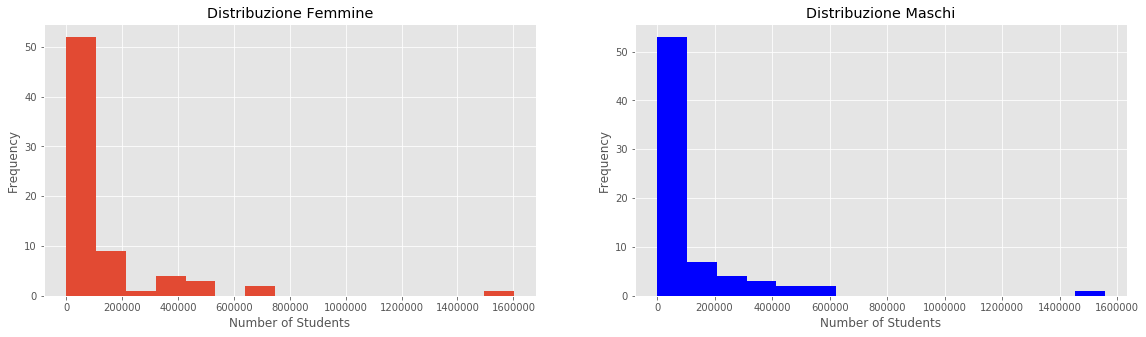

In [109]:
plt.figure(figsize=(30,5))

plt.subplot(131)
countries['femmine'].plot(kind='hist', bins=15)
plt.title('Distribuzione Femmine')
plt.xlabel('Number of Students')
plt.subplot(132)
countries['maschi'].plot(kind='hist', bins=15, color='b')
plt.title('Distribuzione Maschi')
plt.xlabel('Number of Students')

### 6. Find the universities where the ratio between female and male is below the average ratio (computed over all universities)

#### Cancelliamo il record 2227 =>  Ewha Womans University (Università di sole donne, rende il rapporto femmine/maschi pari a infinito)

In [56]:
most_times.drop(axis=1, index=2227, inplace=True)

#### Notiamo che sono presenti due errori nel nome di due nazioni: 'Unisted States of America' e 'Unted Kingdom'

In [57]:
most_times[(most_times['country'] == 'Unisted States of America') | (most_times['country'] == 'Unted Kingdom')]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,femmine,maschi
2205,401-500,Aston University,Unted Kingdom,18.4,92.5,20.4,51.9,34.6,-,NaN,NaN,NaN,nan,2016,NaN,NaN
2019,201-250,University of Hawai’i at Mānoa,Unisted States of America,32.0,63.4,35.5,67.7,44.7,-,NaN,NaN,NaN,nan,2016,NaN,NaN


#### Vediamo che questi record non contengono osservazioni importanti quindi decidiamo di eliminarli

In [58]:
most_times.drop(axis=1, index=2019, inplace=True)
most_times.drop(axis=1, index=2205, inplace=True)

#### Calcoliamo il rapporto tra femmine e maschi per ogni Università 

In [59]:
most_times['numerical_ratio'] = most_times['femmine'] / most_times['maschi']

In [60]:
most_times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,femmine,maschi,numerical_ratio
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,35569.0,17.0,1%,-,2016,NaN,NaN,NaN
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,17422.0,15.9,15%,48 : 52,2016,8363.0,9059.0,0.923170
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,16099.0,24.2,17%,32 : 68,2016,5152.0,10947.0,0.470631
1908,=106,Aarhus University,Denmark,36.9,76.8,50.7,79.8,68.3,57.7,23895.0,13.6,14%,54 : 46,2016,12903.0,10992.0,1.173854
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,9252.0,19.2,18%,48 : 52,2016,4441.0,4811.0,0.923093


#### Calcoliamo la media dei rapporti

In [61]:
average_ratio = most_times['numerical_ratio'].mean()

#### Creiamo un nuovo dataframe dove vengono mostratesolamente le Università che hanno il rapporto Femmine/Maschi sotto la media

In [63]:
below_average = most_times[most_times['numerical_ratio'] < average_ratio]

In [64]:
below_average.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,femmine,maschi,numerical_ratio
2003,201-250,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,-,17422.0,15.9,15%,48 : 52,2016,8363.0,9059.0,0.923170
2056,251-300,Aalto University,Finland,31.1,65.4,32.8,62.1,61.6,-,16099.0,24.2,17%,32 : 68,2016,5152.0,10947.0,0.470631
2105,301-350,Aberystwyth University,United Kingdom,21.6,72.2,18.9,67.2,31.3,-,9252.0,19.2,18%,48 : 52,2016,4441.0,4811.0,0.923093
2406,601-800,Ajou University,South Korea,19.5,20.0,11.9,23.9,45.7,-,12706.0,11.3,2%,33 : 67,2016,4193.0,8513.0,0.492541
2408,601-800,Alexandria University,Egypt,20.3,33.7,8.2,14.1,29.7,-,127431.0,23.3,1%,46 : 54,2016,58618.0,68813.0,0.851845


### 7. For each country, compute the fraction of the students in the country that are in one of the universities computed in the previous point (that is, the denominator of the ratio is the total number of students over all universities in the country).

#### Aggreghiamo con una groupby le osservazioni in base al paese di provenienza nel "times" dataframe

In [65]:
most_times_country = most_times.groupby('country').sum()

In [66]:
most_times_country.head()

,teaching,research,citations,num_students,student_staff_ratio,year,femmine,maschi,numerical_ratio
country,,,,,,,,,
Argentina,16.0,9.0,12.5,108373.0,38.1,2016,67191.0,41182.0,1.631562
Australia,891.6,1017.8,1878.7,743627.0,834.5,62496,391736.0,321640.0,38.893561
Austria,195.2,159.9,432.4,134477.0,160.7,14112,68364.0,66113.0,7.636423
Bangladesh,21.7,7.2,9.6,62716.0,6.9,2016,21323.0,41393.0,0.515135
Belarus,20.2,8.7,6.0,29303.0,10.6,2016,20219.0,9084.0,2.225782


#### Effettuiamo la stessa procedura per il dataframe ottenuto nel punto precedente

In [67]:
below_average_country = below_average.groupby('country').sum()

In [68]:
below_average_country.head()

,teaching,research,citations,num_students,student_staff_ratio,year,femmine,maschi,numerical_ratio
country,,,,,,,,,
Australia,178.9,209.5,395.4,146235.0,156.7,12096,69448.0,76787.0,5.482233
Austria,105.9,76.2,248.2,61033.0,96.5,8064,21935.0,39098.0,2.574915
Bangladesh,21.7,7.2,9.6,62716.0,6.9,2016,21323.0,41393.0,0.515135
Brazil,266.2,184.0,183.5,278774.0,127.5,18144,130413.0,148361.0,7.478620
Canada,74.6,91.3,134.9,86779.0,84.3,6048,41102.0,45677.0,2.704953


#### Uniamo i due Dataframe per ottenere solo il numero totale degli studenti appartenenti alle Università calcolate nel punto 6 

In [69]:
merged_country = pd.merge(most_times_country, below_average_country, how='outer', left_index=True, right_index=True)[['num_students_x','num_students_y']]

In [70]:
merged_country['num_students_y'].fillna(0,inplace=True)
merged_country.head()

,num_students_x,num_students_y
country,,
Argentina,108373.0,0.0
Australia,743627.0,146235.0
Austria,134477.0,61033.0
Bangladesh,62716.0,62716.0
Belarus,29303.0,0.0


#### Ne calcoliamo il rapporto

In [71]:
merged_country['ratio'] = merged_country['num_students_y']/merged_country['num_students_x']

In [72]:
merged_country

,num_students_x,num_students_y,ratio
country,,,
Argentina,108373.0,0.0,0.000000
Australia,743627.0,146235.0,0.196651
Austria,134477.0,61033.0,0.453855
Bangladesh,62716.0,62716.0,1.000000
Belarus,29303.0,0.0,0.000000
Belgium,169661.0,0.0,0.000000
Brazil,534688.0,278774.0,0.521377
Canada,717054.0,86779.0,0.121022
Chile,116026.0,90951.0,0.783885


### 8. Read the file `educational_attainment_supplementary_data.csv`, discarding any row with missing `country_name` or `series_name`

#### Leggiamo il dataframe Attainment_supplementary_data.csv

In [73]:
attainment = database['educational_attainment_supplementary_data']

In [74]:
print(len(attainment))
attainment.head(100)

79055


,country_name,series_name,1985,1986,1987,1990,1991,1992,1993,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2015
0,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.33,NaN,NaN,0.44,NaN,NaN,NaN,0.57,...,0.86,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN
1,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1.03,NaN,NaN,1.26,NaN,NaN,NaN,1.54,...,2.18,NaN,NaN,NaN,NaN,2.64,NaN,NaN,NaN,NaN
2,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.83,NaN,NaN,0.95,NaN,NaN,NaN,1.26,...,1.01,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN
3,Afghanistan,"Barro-Lee: Average years of primary schooling,...",2.34,NaN,NaN,2.22,NaN,NaN,NaN,2.37,...,2.26,NaN,NaN,NaN,NaN,3.55,NaN,NaN,NaN,NaN
4,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.54,NaN,NaN,0.92,NaN,NaN,NaN,0.94,...,2.00,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,NaN
5,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1.52,NaN,NaN,2.51,NaN,NaN,NaN,2.27,...,3.93,NaN,NaN,NaN,NaN,2.64,NaN,NaN,NaN,NaN
6,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.17,NaN,NaN,0.25,NaN,NaN,NaN,0.37,...,0.63,NaN,NaN,NaN,NaN,0.81,NaN,NaN,NaN,NaN
7,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.66,NaN,NaN,0.85,NaN,NaN,NaN,1.14,...,1.69,NaN,NaN,NaN,NaN,2.19,NaN,NaN,NaN,NaN
8,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.44,NaN,NaN,0.54,NaN,NaN,NaN,0.92,...,1.26,NaN,NaN,NaN,NaN,1.92,NaN,NaN,NaN,NaN
9,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1.28,NaN,NaN,1.52,NaN,NaN,NaN,2.51,...,2.48,NaN,NaN,NaN,NaN,3.93,NaN,NaN,NaN,NaN


In [75]:
attainment[attainment['series_name'] == np.nan]

,country_name,series_name,1985,1986,1987,1990,1991,1992,1993,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2015


#### Eliminiamo le rige contenenti Missing Values

In [76]:
attainment.dropna(subset=['country_name','series_name'],inplace=True)

In [77]:
attainment.columns

Index(['country_name', 'series_name', '1985', '1986', '1987', '1990', '1991',
       '1992', '1993', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2015'],
      dtype='object')

### 9. From `attainment` build a dataframe with the same data, but with 4 columns: `country_name`, `series_name`, `year`, `value`

#### Trasponiamo il dataframe in modo da ottenere gli attributi relativi al Paese di riferimento, all'Università, all'anno e al valore

In [78]:
attainment_melt = pd.melt(attainment, id_vars=['country_name','series_name'], value_vars=[year for year in attainment.columns[2:]])

In [112]:
attainment_melt.rename(columns={'variable':'year'}, inplace=True)

In [113]:
attainment_melt.head()

,country_name,series_name,year,value
0,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1985,0.33
1,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1985,1.03
2,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1985,0.83
3,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1985,2.34
4,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1985,0.54


### 10. For each university, find the number of rankings in which they appear (it suffices to appear in one year for each ranking).

#### Calcoliamo il numero di ranking delle Università

In [80]:
times_unique = times['university_name'].unique()
cWurData_unique = cWurData['institution'].unique()
shanghai_unique = shanghai['university_name'].unique()

In [81]:
count = []
count.extend(times_unique)
count.extend(cWurData_unique)
count.extend(shanghai_unique)

count = pd.DataFrame(dict(Counter(count)),index=['count rank']).transpose()
count.head()

,count rank
Harvard University,3
California Institute of Technology,3
Massachusetts Institute of Technology,2
Stanford University,3
Princeton University,3


### 11. In the times ranking, compute the number of times each university appears

#### Dopo aver raggruppato in base all'Università, calcoliamo quante volte quest'ultima appare nel dataframe "times"

In [116]:
pd.DataFrame(times.groupby('university_name').size(), columns=['count'])

,count
university_name,
AGH University of Science and Technology,1
Aalborg University,5
Aalto University,5
Aarhus University,6
Aberystwyth University,5
Adam Mickiewicz University,1
Aix-Marseille University,1
Ajou University,1
Alexandria University,3


### 12. Find the universities that appear at most twice in the times ranking.

#### Calcoliamo quali Università appaiono al massimo 2 volte

In [83]:
occurrences = times.groupby('university_name').size()
pd.DataFrame(occurrences[occurrences < 3],columns=['count'])

,count
university_name,
AGH University of Science and Technology,1
Adam Mickiewicz University,1
Aix-Marseille University,1
Ajou University,1
Alexandru Ioan Cuza University,1
Aligarh Muslim University,1
American University,1
American University of Beirut,1
American University of Sharjah,1


### 13. The universities that, in any year, have the same position in all three rankings (they must have the same position in a year).

#### Merge su tutti i rankings

In [84]:
all_rankings = pd.merge(times,shanghai, on='university_name')

In [85]:
all_rankings = pd.merge(all_rankings,cWurData, left_on='university_name', right_on='institution')

#### Controlliamo le colonne

In [86]:
all_rankings.columns

Index(['world_rank_x', 'university_name', 'country_x', 'teaching',
       'international', 'research', 'citations_x', 'income', 'total_score_x',
       'num_students', 'student_staff_ratio', 'international_students',
       'female_male_ratio', 'year_x', 'world_rank_y', 'national_rank_x',
       'total_score_y', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp',
       'year_y', 'world_rank', 'institution', 'country_y', 'national_rank_y',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations_y', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

#### Consideriamo solo le colonne che ci interessano

In [87]:
all_rankings = all_rankings[['university_name','world_rank_x','world_rank_y','world_rank', 'year_x','year_y','year']]

In [88]:
all_rankings.head()

,university_name,world_rank_x,world_rank_y,world_rank,year_x,year_y,year
0,Harvard University,1,1,1,2011,2005,2012
1,Harvard University,1,1,1,2011,2005,2013
2,Harvard University,1,1,1,2011,2005,2014
3,Harvard University,1,1,1,2011,2005,2015
4,Harvard University,1,1,1,2011,2006,2012


#### Rinominiamo le colonne

In [89]:
all_rankings = all_rankings.rename(columns={'world_rank_x':'rank_times',
                             'world_rank_y':'rank_shangai',
                             'world_rank':'rank_cwur',
                             'year_x':'year_times',
                             'year_y':'year_shangai',
                             'year':'year_cwur'})

In [90]:
all_rankings.head()

,university_name,rank_times,rank_shangai,rank_cwur,year_times,year_shangai,year_cwur
0,Harvard University,1,1,1,2011,2005,2012
1,Harvard University,1,1,1,2011,2005,2013
2,Harvard University,1,1,1,2011,2005,2014
3,Harvard University,1,1,1,2011,2005,2015
4,Harvard University,1,1,1,2011,2006,2012


#### Applichiamo la funzione 'estrai_rank' usata nel punto 4 per trattare gli intervalli

In [91]:
all_rankings['rank_times'] = all_rankings.apply(lambda row: estrai_rank(row['rank_times']), axis=1)
all_rankings['rank_shangai'] = all_rankings.apply(lambda row: estrai_rank(row['rank_shangai']), axis=1)

#### Troviamo i records con la stessa posizione nello stesso anno

In [92]:
all_rankings[((all_rankings['rank_times']==all_rankings['rank_shangai']) & (all_rankings['rank_shangai'] == all_rankings['rank_cwur']))
            & ((all_rankings['year_times']==all_rankings['year_shangai']) & (all_rankings['year_shangai'] == all_rankings['year_cwur']))]

,university_name,rank_times,rank_shangai,rank_cwur,year_times,year_shangai,year_cwur
649,Stanford University,2,2,2,2013,2013,2013
